<a href="https://colab.research.google.com/github/ivanrango/Machine-Learning/blob/master/Trabajo_pr%C3%A1ctico_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3.1

Generación de los datasets gaussianos

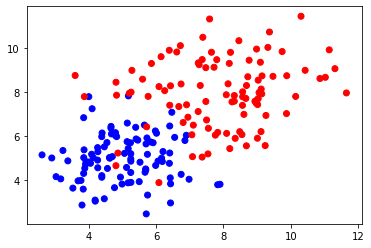

In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


dfA = pd.DataFrame(np.random.normal(loc=5, scale=1, size=(100, 2)),columns=['x','y'])
dfA['color'] = 'b'
dfA['target'] = 'A'
dfB = pd.DataFrame(np.random.normal(loc=8, scale=1.5, size=(100, 2)),columns=['x','y'])
dfB['color'] = 'r'
dfB['target'] ='B'
df = pd.concat([dfA,dfB],ignore_index=True)

plt.scatter(df['x'],df['y'],c=df['color'])

plt.show()



Una vez que se tienen los datasets, se utiliza una porción de los mismos para entrenar un modelo de "k" vecinos más cercanos o KNN. Dicho modelo se importa desde scikitlearn.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']], [1 if x == 'B' else 0 for x in df['target']], test_size = 0.4, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1]


Una vez obtenidas las predicciones del modelo, es posible obtener la "Matriz de confusión" que ofrece información sobre los verdaderos positivos, los verdaderos negativos, los falsos positivos y los falsos negativos.

F-measure = 0.9620253164556963


Text(0.5, 0.98, 'Matriz de confusión')

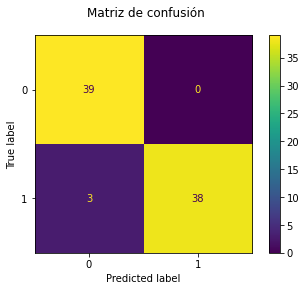

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("F-measure =",metrics.f1_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión")

Puede apreciarse que la eficacia predictiva del modelo es buena (0,938), de manera que el 93% de las veces el modelo predice de manera acertada si un valor de pertenece al dataset A o B.

A continuación se muestra un resultado con un par de datasets cuyos centroides se encuentran más cerca que en el caso anterior:

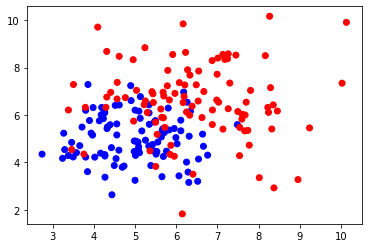

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

dfA = pd.DataFrame(np.random.normal(loc=5, scale=1, size=(100, 2)),columns=['x','y'])
dfA['color'] = 'b'
dfA['target'] = 'A'
dfB = pd.DataFrame(np.random.normal(loc=6.5, scale=1.5, size=(100, 2)),columns=['x','y'])
dfB['color'] = 'r'
dfB['target'] ='B'
df = pd.concat([dfA,dfB],ignore_index=True)

plt.scatter(df['x'],df['y'],c=df['color'])

plt.show()

[0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1
 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1]
F-measure = 0.8133333333333334


Text(0.5, 0.98, 'Matriz de confusión')

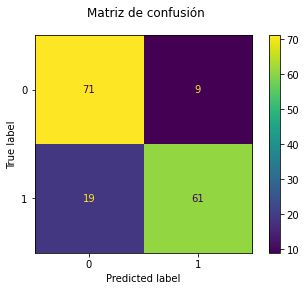

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']], [1 if x == 'B' else 0 for x in df['target']], test_size = 0.8, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("F-measure =",metrics.f1_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión")

Como se aprecia, en este caso la eficacia en la predicción no es tan buena como en el primer caso.

Otra prueba interesante, es cambiar la cantidad de primeros vecinos, es decir el valor "k". En el primer caso se tienen 10  primeros vecinos, a continuación se muestran los resultados para la primera simulación pero coniderando 5 y 15 primeros vecinos, respectivamnte:


F-measure = 0.9367088607594938


Text(0.5, 0.98, 'Matriz de confusión')

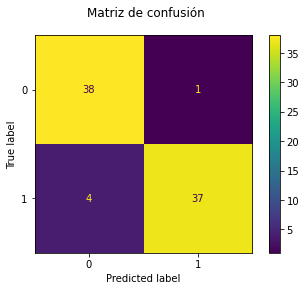

In [60]:
dfA = pd.DataFrame(np.random.normal(loc=5, scale=1, size=(100, 2)),columns=['x','y'])
dfA['color'] = 'b'
dfA['target'] = 'A'
dfB = pd.DataFrame(np.random.normal(loc=8, scale=1.5, size=(100, 2)),columns=['x','y'])
dfB['color'] = 'r'
dfB['target'] ='B'
df = pd.concat([dfA,dfB],ignore_index=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']], [1 if x == 'B' else 0 for x in df['target']], test_size = 0.4, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("F-measure =",metrics.f1_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión")

F-measure = 0.9090909090909091


Text(0.5, 0.98, 'Matriz de confusión')

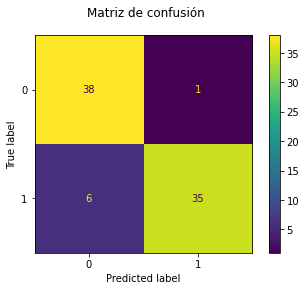

In [61]:
dfA = pd.DataFrame(np.random.normal(loc=5, scale=1, size=(100, 2)),columns=['x','y'])
dfA['color'] = 'b'
dfA['target'] = 'A'
dfB = pd.DataFrame(np.random.normal(loc=8, scale=1.5, size=(100, 2)),columns=['x','y'])
dfB['color'] = 'r'
dfB['target'] ='B'
df = pd.concat([dfA,dfB],ignore_index=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']], [1 if x == 'B' else 0 for x in df['target']], test_size = 0.4, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("F-measure =",metrics.f1_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión")

Puede apreciarse que la eficacia predictiva del modelo es mejor con k=5 que con k=15, pero el valor más alto se obtiene con k=10. 


# Ejercicio 3.3

Cargo el Dataset de Spotify:

In [63]:
import pandas as pd

attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [64]:
print(attributes_spotify.shape)

(2017, 17)


Observo la forma que tiene el Dataset:

In [65]:
attributes_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Grafico las variables que considero más relevantes:

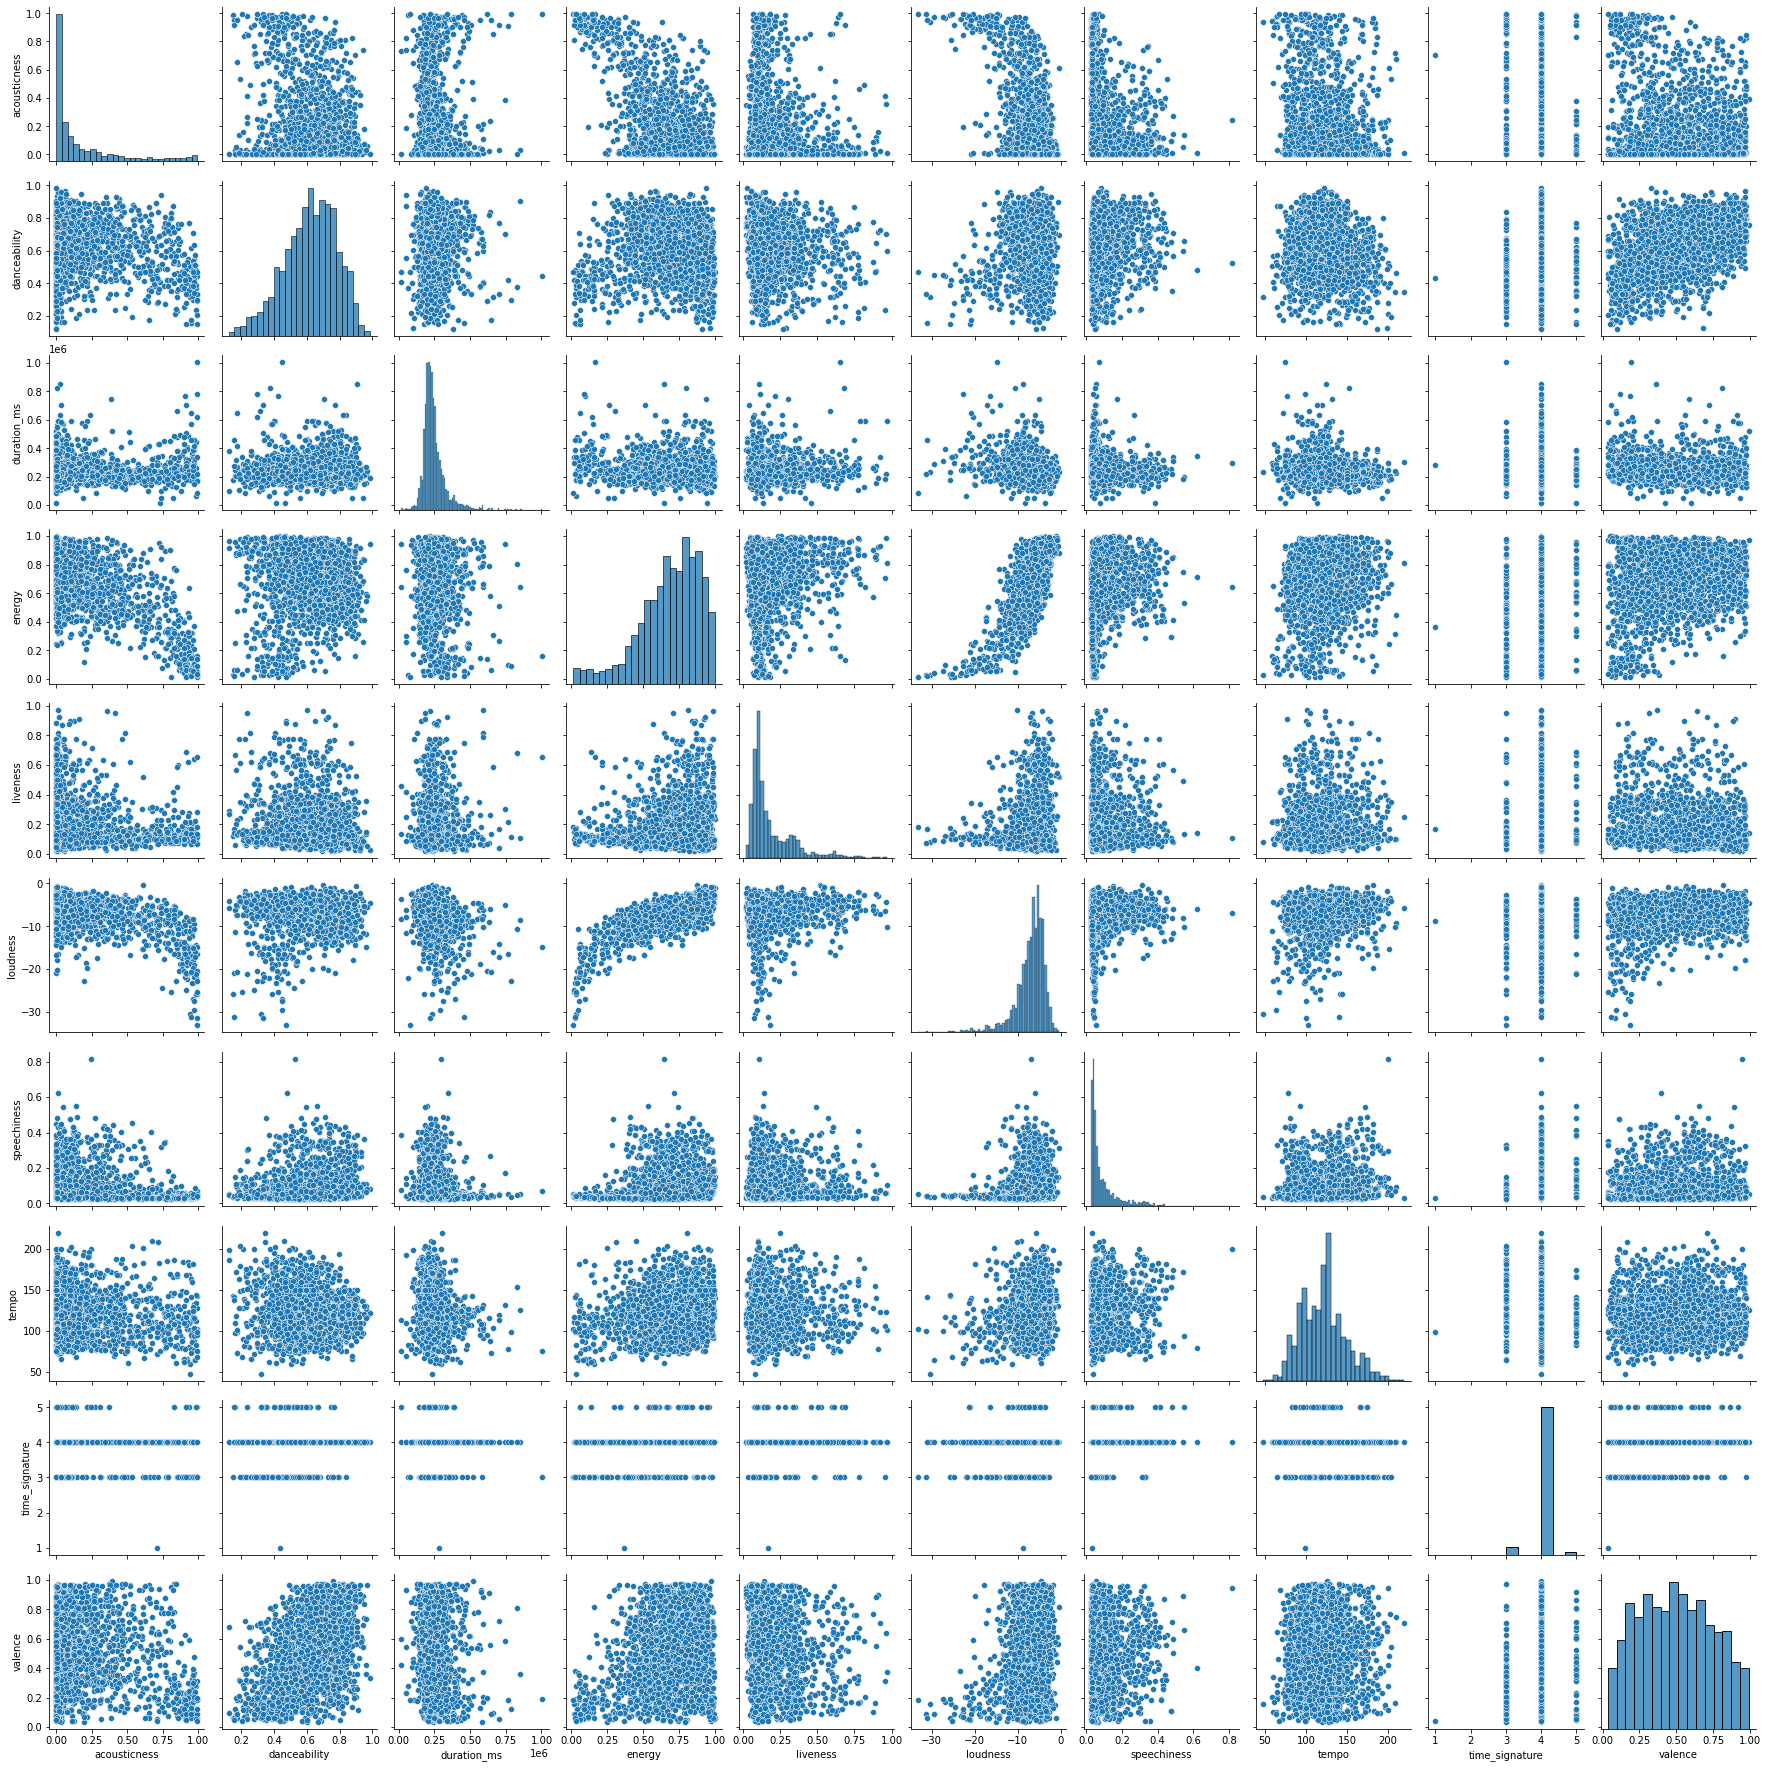

In [66]:
import seaborn as sns

sns.pairplot(attributes_spotify[['acousticness',	'danceability',	'duration_ms', 'energy', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']])

Se observa que no todos los datos siguen una distribución conocida, por lo que resulta necesario normalizarlos. Se define la columna "target" como la variable **y**, se dejan de lado de la normalización y del data frame las columnas "Song_title", "artist" y "time_signature". Esta última columna se deja de lado ya que en el histograma correspondiente se observa que es básicamente una sola columna, por lo que no agregaría valor en la decisión de gustar o no gustar una canción.


In [67]:
 from sklearn.preprocessing import StandardScaler


df = attributes_spotify
y = df['target']

df = df.drop(columns = ['target', 'song_title', 'artist', 'time_signature'])

X = df.to_numpy()
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

y = y.to_numpy()


Una vez normalizadas las vairables, se procede a aplicar el modelo KNN de scikit-learn, del mismo modo que en el ejercicio 3.1, aunque ahora k = 44 ya que N = 2017 (k = N^1/2):

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 44)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1
 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1
 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1
 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 

F-measure = 0.9269949066213921


Text(0.5, 0.98, 'Matriz de confusión')

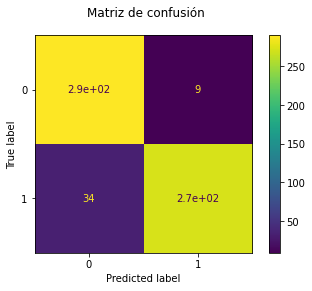

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("F-measure =",metrics.f1_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión")

La matriz de confusión obtenida es satisfactoria, obteniendo valores de verdaderos positivos y verdaderos negativos por encima de los falsos negativos y falsos positivos. Es decir, cuando se predice que una canción va a ser gustada o no va a ser gustada, se acierta un 92% de las veces.

A continuación se realiza un análisis de validación cruzada, particionando el dataset en 10 grupos y obteneindo valores de eficacia de la predicción, de manera de poder comparar con el modelo original y también entre particiones. 

In [70]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier, X, y, cv=10)

score = np.array(score)
score_mean = np.array(score).mean()
print("Eficacia de cada partición: ", score)
print("Eficacia promedio de las 10 particiones de KFold: ", score_mean)

Eficacia de cada partición:  [0.98514851 0.95544554 0.98514851 0.96039604 0.92574257 0.92574257
 0.95049505 0.86567164 0.87064677 0.78606965]
Eficacia promedio de las 10 particiones de KFold:  0.921050687158268


Como se puede apreciar, la particion más "efectiva" o que maximiza la eficacia de predicción del modelo KNN es la primera (igual a la tercera) y la que la minimiza es la última partición.

Otro método de particionar el dataset es mediante la validación cruzada estratificada, que es similar a la anterior, aunque mezcla los valores del dataset antes de realizar la partición, de manera tal de quitarle sesgo en caso de que lo tenga.

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

accuracy=[]

folds = StratifiedKFold(n_splits=10, random_state=None)
folds.get_n_splits(X, y)

for train_index, test_index in folds.split(X,y):
  #print("train: ", train_index, "Validation: ", test_index)
  X_train, X_test = X[train_index], X[test_index] 
  y_train, y_test = y[train_index], y[test_index] 

  classifier.fit(X_train, y_train)
  prediction=classifier.predict(X_test)
  score=accuracy_score(prediction, y_test)
  accuracy.append(score)

accuracy = np.array(accuracy)
accuracy_mean = np.array(accuracy).mean()

print("Eficacia de cada partición: ", accuracy)
print("Eficacia promedio de las 10 particiones de Stratified KFold: ", accuracy_mean)

Eficacia de cada partición:  [0.98514851 0.95544554 0.98514851 0.96039604 0.92574257 0.92574257
 0.95049505 0.86567164 0.87064677 0.78606965]
Eficacia promedio de las 10 particiones de Stratified KFold:  0.921050687158268


Se puede observar que con este método la eficacia de las particiones no varía mucho respecto del método  anterior. Lo mismo vale para la eficacia promedio de los dos métodos.

Finalmente, rsulta de interés investigar cuál es el valor óptimo de **k** vecinos más cercanos, es decír el valor que maximice la eficacia predictiva del modelo.

Text(0, 0.5, 'Cross-Validated Accuracy')

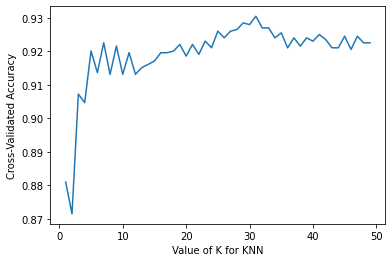

In [72]:
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
#print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Se observa que a partir de aproximadamente K=30 la eficacia predictiva permanece constante (en realidad oscila alrededor de 0,92). Por lo que el valor elegido de k=44 está dentro del rango óptimo.